## DSI-06 Homework 2: ANSWERS
From Chapter 3, found on pages 129-130 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import warnings # for muting warning messages

# mute warning messages
warnings.filterwarnings('ignore')
# Import specific objects
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


a)	Produce a scatterplot matrix which includes all of the numeric variables in the data set.





<module 'matplotlib.pyplot' from 'c:\\Users\\sinho\\OneDrive\\Documents\\DSI_course_material\\estimation_machine_learning_testing\\emt_learners_env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

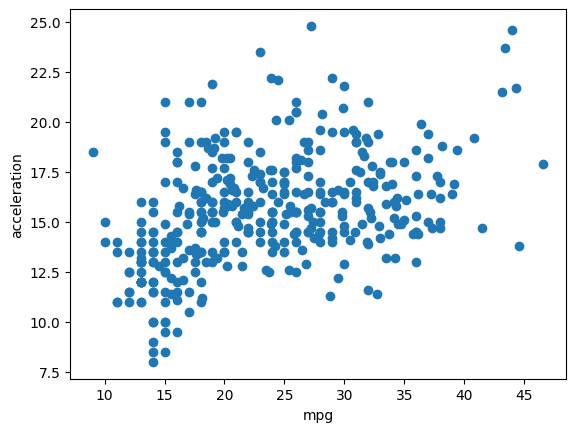

In [18]:
# Extracting 'medv' and 'rm' columns from the dataset
mpg = Auto['mpg']
acceleration = Auto['acceleration']
plt.scatter(mpg, acceleration, label='Data')
plt.xlabel('mpg')
plt.ylabel('acceleration')
plt


b)	Compute the matrix of correlations between the variables using the `DataFrame.corr()` method, and print it.

In [5]:
#Add your code here

correlation = Auto.corr()
correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `model.summary()` function to print the results. Comment on the output: 

(i)  Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question

(ii) Which predictors appear to have a statistically significant relationship to the response?

(iii) What does the coefficient for the year variable suggest ?

In [28]:
#Add your code here
model = sm.OLS.from_formula('medv ~ lstat * age', data=Auto)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              4328.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                   1.46e-213
Time:                        00:16:51   Log-Likelihood:                         -1325.3
No. Observations:                 392   AIC:                                      2653.
Df Residuals:                     391   BIC:                                      2656.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
acceleration     1.4991      0.023     65.785      0.000       1.454       1.544
==============================================================================
Omnibus:                       11.410   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.964
Skew:                           0.417   Prob(JB):                      0.00252
Kurtosis:                       2.809   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

ValueError: 'mpg' is not in list

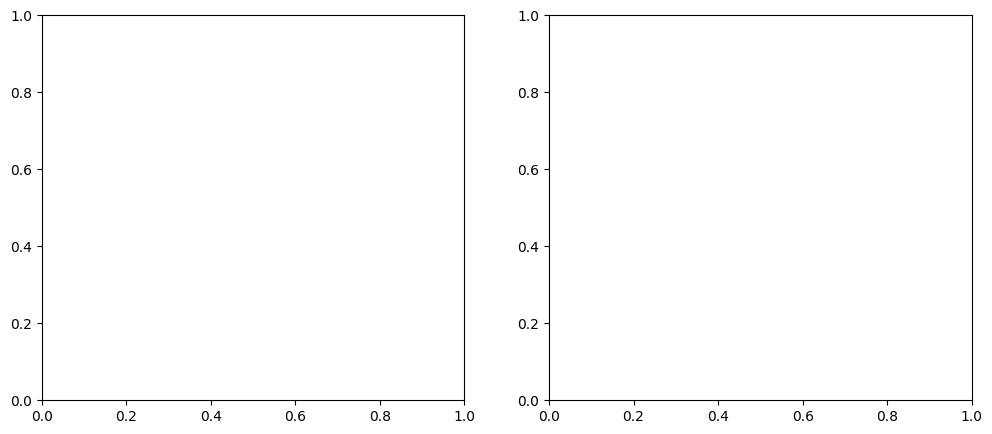

In [29]:
#Add your code here Residuals vs Fitted Values

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sm.graphics.plot_regress_exog(result, 'mpg', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(result.fittedvalues, result.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

In [ ]:
#Add your code here to plot QQ Plot

e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [ ]:
#Add your code here

f) Try a few different transformations of the variables, such as log⁡(X),√X,X^2. Comment on your findings.

In [ ]:
#Add your code here

Additional Practice Questions: 
- Explain the difference between MLR and OLS to a non-technical audience. 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show ? 
- Can you think of a business context where this exercise would have applications?